<h2>Arbeiten mit den Sonardaten</h2>

In [1]:
# Laden der entsprechenden Module
# Wie laden die Module offen, damit man einmal sieht, was da alles benötigt wird
# Allerdings aufpassen, dann werden die Module anderst angesprochen wie beim Standard
# zum Beispiel pyplot und nicht plt
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#Laden der Daten
url = 'sonar-all-data.csv'
dataset = read_csv(url, header=None)

<h3>Beschreibende Statistik</h3>

In [4]:
# Ausgabe df.shape
print(dataset.shape)

(208, 61)


In [6]:
# Ausgabe df.dtypes
# Spalte enthält die Classifikation R oder M
set_option('display.max_rows', 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [8]:
# Ausgabe df.head mit vergösserter display width
set_option('display.width', 100)
print(dataset.head(20))

       0      1      2      3      4      5      6      7      8      9  ...     51     52     53  \
0   0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211 ...  0.003  0.006  0.016   
1   0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287 ...  0.008  0.009  0.005   
2   0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619 ...  0.023  0.017  0.009   
3   0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126 ...  0.012  0.004  0.015   
4   0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446 ...  0.003  0.005  0.011   
5   0.029  0.045  0.028  0.017  0.038  0.099  0.120  0.183  0.210  0.304 ...  0.004  0.001  0.004   
6   0.032  0.096  0.132  0.141  0.167  0.171  0.073  0.140  0.208  0.351 ...  0.020  0.025  0.013   
7   0.052  0.055  0.084  0.032  0.116  0.092  0.103  0.061  0.146  0.284 ...  0.008  0.012  0.004   
8   0.022  0.037  0.048  0.048  0.065  0.059  0.075  0.010  0.068  0.149 ...  0.015  0.013 

In [10]:
# Ausgabe df.describe() mit 4 Nachkomma Stellen
set_option('precision', 4)
print(dataset.describe())

             0         1         2         3         4         5         6         7         8   \
count  208.0000  208.0000  208.0000  208.0000  208.0000  208.0000  208.0000  208.0000  208.0000   
mean     0.0292    0.0384    0.0438    0.0539    0.0752    0.1046    0.1217    0.1348    0.1780   
std      0.0230    0.0330    0.0384    0.0465    0.0556    0.0591    0.0618    0.0852    0.1184   
min      0.0015    0.0006    0.0015    0.0058    0.0067    0.0102    0.0033    0.0055    0.0075   
25%      0.0134    0.0164    0.0189    0.0244    0.0381    0.0670    0.0809    0.0804    0.0970   
50%      0.0228    0.0308    0.0343    0.0440    0.0625    0.0922    0.1069    0.1121    0.1522   
75%      0.0355    0.0479    0.0580    0.0645    0.1003    0.1341    0.1540    0.1696    0.2334   
max      0.1371    0.2339    0.3059    0.4264    0.4010    0.3823    0.3729    0.4590    0.6828   

             9     ...           50        51        52        53        54        55        56  \
count  20

In [11]:
# Ausgabe der Klassen Verteilung in der Spalte 60
print(dataset.groupby(60).size())


60
M    111
R     97
dtype: int64


<h3>Visualisierung der Daten</h3>

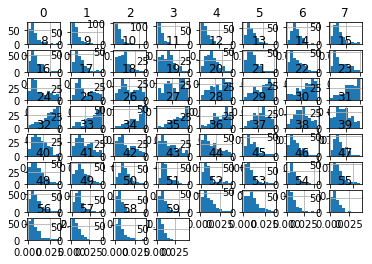

In [14]:
# Ausgabe Histogramm
dataset.hist()
pyplot.show()

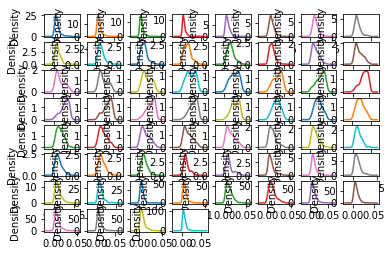

In [15]:
# Ausgabe der Dichtefunktion
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()

In [22]:
# Ausgabe scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

KeyboardInterrupt: 

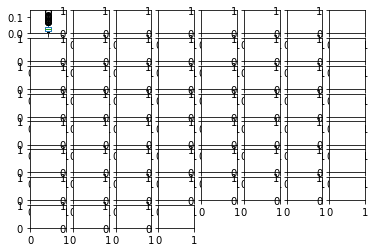

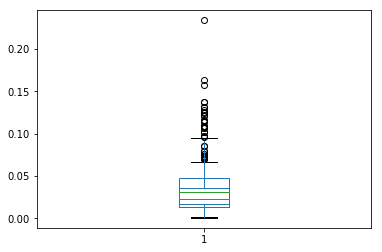

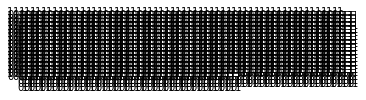

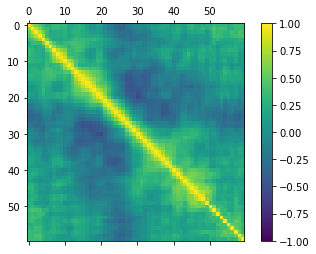

In [23]:
# Ausgabe correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

<h3>Vorbereiten der Daten: Aufteilen in Test und Trainingsdaten </h3>

In [24]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [25]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.705882 (0.125572)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


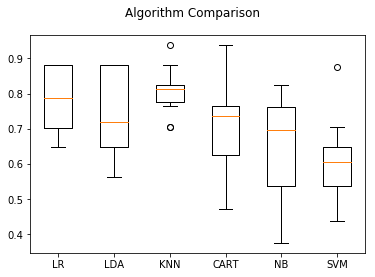

In [26]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.723529 (0.099548)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


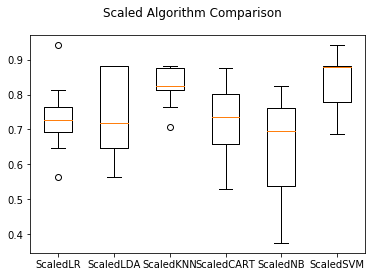

In [28]:
# Vergleich der Algorithmen
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Im Ergebnis sind also K-NN und SCM die Algorithmen<br>
die bessere Ergebnisse liefern<br>
In die weiteren Betrachtungen und Optimierungen werden nur<br>
noch diese Algorithmen einbezogen.<br>

In [29]:
# Tuning K-NN mit skalierten Daten - Die Anzahl der Nachbarn wird variiert
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.710843 (0.078716) with: {'n_neighbors': 17}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.710843 (0.108829) with: {'n_neighbors': 21}


In [30]:
# Tuning der SVM mit skalierten Daten über ein param_grid
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'kernel': 'rbf', 'C': 1.5}
0.759036 (0.098863) with: {'kernel': 'linear', 'C': 0.1}
0.530120 (0.118780) with: {'kernel': 'poly', 'C': 0.1}
0.572289 (0.130339) with: {'kernel': 'rbf', 'C': 0.1}
0.704819 (0.066360) with: {'kernel': 'sigmoid', 'C': 0.1}
0.746988 (0.108913) with: {'kernel': 'linear', 'C': 0.3}
0.644578 (0.132290) with: {'kernel': 'poly', 'C': 0.3}
0.765060 (0.092312) with: {'kernel': 'rbf', 'C': 0.3}
0.734940 (0.054631) with: {'kernel': 'sigmoid', 'C': 0.3}
0.740964 (0.083035) with: {'kernel': 'linear', 'C': 0.5}
0.680723 (0.098638) with: {'kernel': 'poly', 'C': 0.5}
0.789157 (0.064316) with: {'kernel': 'rbf', 'C': 0.5}
0.746988 (0.059265) with: {'kernel': 'sigmoid', 'C': 0.5}
0.746988 (0.084525) with: {'kernel': 'linear', 'C': 0.7}
0.740964 (0.127960) with: {'kernel': 'poly', 'C': 0.7}
0.813253 (0.084886) with: {'kernel': 'rbf', 'C': 0.7}
0.753012 (0.058513) with: {'kernel': 'sigmoid', 'C': 0.7}
0.759036 (0.096940) with: {'kernel': 'linear', 'C': 0.9

In [31]:
# Aufbauen von Ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.813971 (0.066017)
GBM: 0.829044 (0.136092)
RF: 0.771324 (0.095486)
ET: 0.783088 (0.109618)


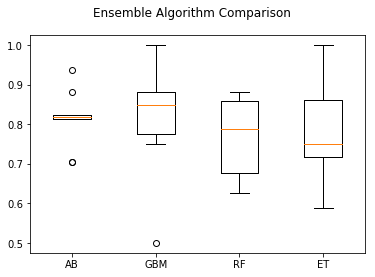

In [32]:
# Vergleich der Algorithmen
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [33]:
# Überprüfen des ausgewählten Modells,SVM (Support Vektor Machine), auf den Validierungsdaten

# Vorbereiten des Modells
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#Validierung des SVM Modells
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# Abschätzung der accuracy auf den Validierungs Daten
rescaledValidationX = scaler.transform(X_validation)
# Durchführen der Vorhersagen auf den Validierungsdaten
predictions = model.predict(rescaledValidationX)
# Ausgabe accuracy
print(accuracy_score(Y_validation, predictions))
# Ausgabe Confusion Matrix
print(confusion_matrix(Y_validation, predictions))
# Ausgabe classification_report
print(classification_report(Y_validation, predictions))

0.857142857143
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42

